In [ ]:
pip install pysptk

     |████████████████████████████████| 419kB 8.7MB/s 
  Created wheel for pysptk: filename=pysptk-0.1.18-cp37-cp37m-linux_x86_64.whl size=951932 sha256=52f250811237176fd49375d0130d9b3ebb0884b6ebd41b0a4321902414782677
  Stored in directory: /root/.cache/pip/wheels/c7/96/d2/a163240019c59504402fab713af259026af81a99dea943404a
Successfully built pysptk


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pysptk
import librosa
from scipy.io import wavfile

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: WavFileWarning: Chunk (non-data) not understood, skipping it.
  


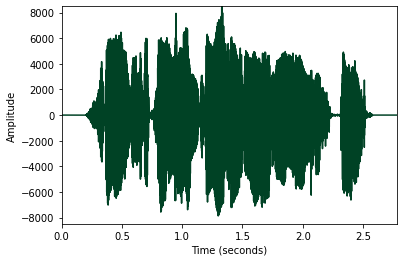

In [ ]:
#wavfn= ”fena_0001.wav”
fs, x = wavfile.read('/content/gdrive/My Drive/Colab Notebooks/fena_0001.wav')
y = np.linspace(0,len(x)/float(fs), len(x))
ya = np.max(np.absolute(x))
plt.plot(y, x, color="#004225")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.ylim(-ya, ya)
plt.xlim(0, y[-1])
plt.show()

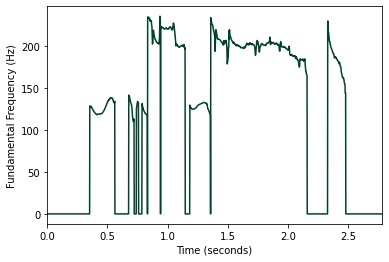

In [ ]:
#pysptk RAPT
F0 = pysptk.rapt(x.astype(np.float32), fs, 80, 60, 240, 0, (1) )
y = np.linspace(0,len(x)/float(fs), len(F0))
plt.plot(y, F0,  color="#004225")
plt.xlabel("Time (seconds)")
plt.ylabel("Fundamental Frequency (Hz)")
plt.xlim(0, y[-1])
plt.show()

In [ ]:
frame_length = 1024
hop_length = 80

# Note that almost all of pysptk functions assume input array is C-contiguous and np.float64 element type
frames = librosa.util.frame(x, frame_length=frame_length, hop_length=hop_length).astype(np.float64).T

# Windowing
frames *= pysptk.blackman(frame_length)

assert frames.shape[1] == frame_length

In [ ]:

# Pick a short segment
pos = 40000
frame_length = 1024

xw = x[pos:pos+frame_length] * pysptk.blackman(frame_length)

plt.plot(xw, linewidth=3.0)
#xlim(0, frame_length)
#title("a windowed time frame")

ValueError: ignored

In [ ]:
LPC = pysptk.lpc(xw, 25, 1e-06, True)

In [ ]:
# Compute spectrum 20log|X(w)| for a windowed signal
sp = 20*np.log10(np.abs(np.fft.rfft(xw)))

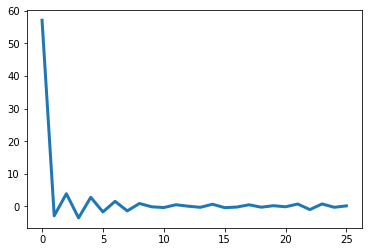

In [ ]:
plt.plot(LPC, linewidth=3.0)

In [ ]:
np.savetxt('fena2.csv', F0, delimiter=',')

In [ ]:
F0

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

In [ ]:
# Sample list of text

#Lines = ["This is line A\n", "This is line B\n", "This is line C\n"]
#Lines


# Write the strings in the list to text file

with open('Example2.txt', 'w') as writefile:
    for line in F0:
        print(line)
        writefile.write(F0)

0.0


TypeError: ignored

In [ ]:
!ls -lh fena_0001pysptk.png

In [ ]:
from IPython.display import Image
Image('fena_0001pysptk.png')

In [ ]:
mean_f0 = np.true_divide(F0.sum(0), (f0 != 0).sum(0))

In [ ]:
from google.colab import files
plt.savefig("abc.png")
files.download("abc.png") 

In [ ]:
#pysptk SWIPE
F0 = pysptk.swipe(x.astype(np.float64), fs, 80, 60, 240, 0.3, (1) )
y = np.linspace(0,len(x)/float(fs), len(F0))
plt.plot(y, F0,  color="#004225")
plt.xlabel("Time (seconds)")
plt.ylabel("Fundamental Frequency (Hz)")
plt.xlim(0, y[-1])
plt.show()